In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import gym

In [2]:
from hydra.experimental import compose, initialize
initialize(
    config_dir="../configs", strict=True,
)

In [3]:
import rl_trickery.envs
import rl_trickery.utils.utils as utils
from rl_trickery.utils.logger import Logger
from rl_trickery.utils.video import VideoRecorder
from rl_trickery.envs import make_envs

In [4]:
cfg = compose("config.yaml")
print(cfg.pretty())

agent:
  alpha: 0.99
  clip_param: 0.1
  device: ${device}
  entropy_coef: 0.01
  eps: 1.0e-05
  gae_lambda: 0.95
  gamma: 0.99
  lr: 0.00025
  max_grad_norm: 0.5
  name: ppo
  num_env_steps: 10000000.0
  num_envs: 8
  num_mini_batch: 4
  num_steps: 128
  ppo_epoch: 16
  recurrent_policy: false
  use_gae: true
  use_proper_time_limits: false
  value_loss_coef: 0.5
device: cuda:0
env:
  augment: true
  clip_rewards: false
  device: ${device}
  env_id: Mazelab-v0
  env_kwargs:
    goal_fixed: false
    maze_fixed: false
    maze_kind: maze
    maze_size: 15
  episode_life: false
  frame_skip: 1
  frame_stack: 1
  image_size: 64
  num_envs: ${agent.num_envs}
  pytorch_dim_order: true
  random_initial_steps: 0
  to_grayscale: false
eval_frequency_step: 50000.0
log_frequency_step: 1000.0
log_save_tb: true
n_params: ???
num_eval_episodes: 30
num_seed_steps: 1000
num_train_iters: 1
num_train_steps: ${agent.num_env_steps}
save_video: true
seed: 1



In [5]:
cfg.env.env_kwargs

{'maze_kind': 'maze', 'maze_size': 15, 'goal_fixed': False, 'maze_fixed': False}

In [6]:
env = make_envs(
    **cfg.env,
    seed=cfg.seed
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


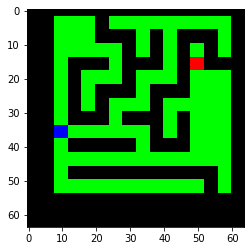

In [7]:
s = env.reset()
plt.imshow(s[7].cpu().numpy().transpose(1, 2, 0))

In [8]:
s

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
        

## Generate fixed mazes

In [9]:
import numpy as np

In [10]:
from rl_trickery.envs.maze import Maze

In [11]:
goal = np.unravel_index(np.argmin(m.board, axis=None), m.board.shape)

NameError: name 'm' is not defined

In [ ]:
np.atleast_2d(goal)

In [ ]:
%cd ../rl_trickery/envs/

In [ ]:
for k in range(4, 65):
    m  = Maze("maze", k)
    np.save("raw_maze_{}".format(k), m.board)

In [ ]:
xxxx

In [ ]:
import pkg_resources

In [ ]:
np.load(pkg_resources.resource_filename("rl_trickery", "envs/mazes/raw_maze_12.npy"))